# Matrix Multiplication

In the previous lessons, we've learned how to multiply a matrix by a vector. Now, we'll extend that to multiplying a matrix by another matrix.

The most intuitive way to understand matrix multiplication is to see it as the **composition of two linear transformations**. If we apply one transformation to our space and then immediately apply a second transformation, the combined effect can be described by a single, new matrix. This new matrix is the **product** of the first two.

---

## A Geometric Example

Let's see this in action. We'll use two transformations:

* **Transformation 1 (Matrix A):**

$ A = \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix} $  

* **Transformation 2 (Matrix B):** 

$ B = \begin{bmatrix} 2 & -1 \\ 0 & 2 \end{bmatrix} $

We will start with our standard basis vectors, apply Transformation A, and then apply Transformation B to the result.

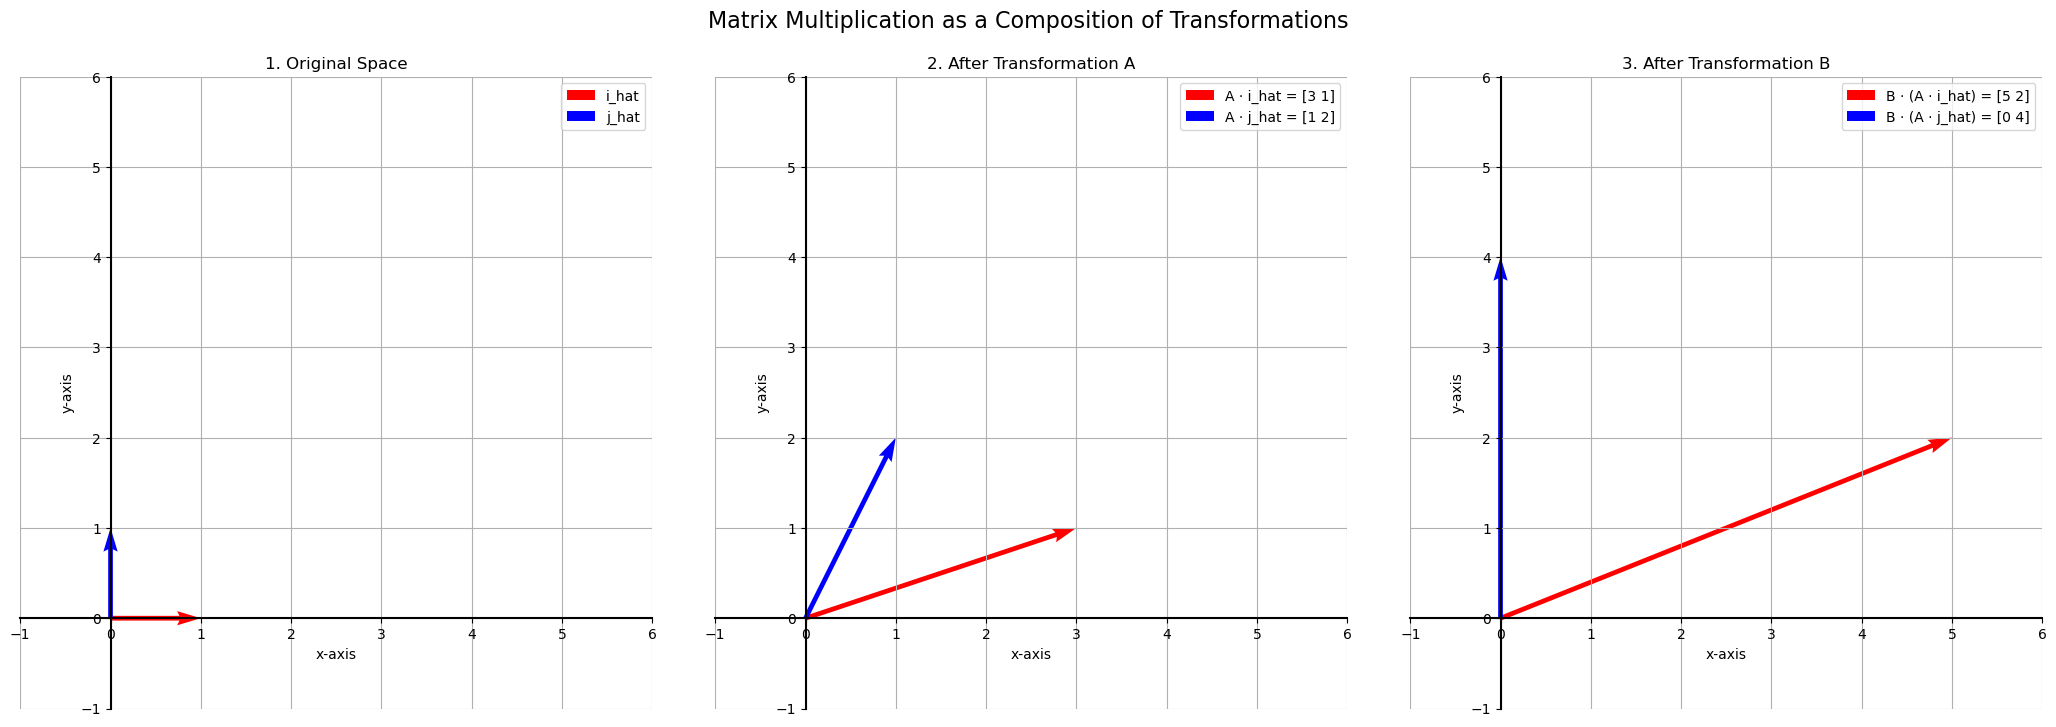

In [1]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the transformation matrices ---
A = np.array([[3, 1], [1, 2]])
B = np.array([[2, -1], [0, 2]])

# --- Define the original basis vectors ---
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

# --- Apply the transformations sequentially ---
# First, apply matrix A
i_hat_A = A @ i_hat
j_hat_A = A @ j_hat

# Second, apply matrix B to the result of A
i_hat_B_A = B @ i_hat_A
j_hat_B_A = B @ j_hat_A

# --- Create the plot ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle('Matrix Multiplication as a Composition of Transformations', fontsize=16, y=1.02)

# --- Plot 1: Original Space ---
ax1.quiver(0, 0, i_hat[0], i_hat[1], angles='xy', scale_units='xy', scale=1, color='red', label='i_hat')
ax1.quiver(0, 0, j_hat[0], j_hat[1], angles='xy', scale_units='xy', scale=1, color='blue', label='j_hat')
ax1.set_title('1. Original Space')

# --- Plot 2: After Transformation A ---
ax2.quiver(0, 0, i_hat_A[0], i_hat_A[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'A · i_hat = {i_hat_A}')
ax2.quiver(0, 0, j_hat_A[0], j_hat_A[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'A · j_hat = {j_hat_A}')
ax2.set_title('2. After Transformation A')

# --- Plot 3: After Transformation B (applied to result of A) ---
ax3.quiver(0, 0, i_hat_B_A[0], i_hat_B_A[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'B · (A · i_hat) = {i_hat_B_A}')
ax3.quiver(0, 0, j_hat_B_A[0], j_hat_B_A[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'B · (A · j_hat) = {j_hat_B_A}')
ax3.set_title('3. After Transformation B')

# --- Format all plots ---
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1, 6)
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.grid(True)
    ax.legend()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

---

# The Resulting Matrix

The combined transformation maps the original basis vectors to their final destinations:
* $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ is sent to $\begin{bmatrix} 5 \\ 2 \end{bmatrix}$.  

* $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ is sent to $\begin{bmatrix} 0 \\ 4 \end{bmatrix}$.

As we learned before, the matrix for this combined transformation is simply the one whose columns are these new basis vectors.

**Combined Matrix (C):**  

$ C = \begin{bmatrix} 5 & 0 \\ 2 & 4 \end{bmatrix} $  

This matrix `C` is the **product** of matrices `B` and `A`.

$ C = B \cdot A $

**Important Note on Order:** The order of multiplication is crucial and works in reverse. Because transformations are applied from the right (e.g., $A \cdot v$), the first transformation to be applied (`A`) is on the right, and the second (`B`) is on the left.

---

## The Algebraic Method: Dot Products

There is a much faster way to calculate the product of two matrices without visualizing the transformations. The rule is:

> **The entry in the *i*-th row and *j*-th column of the product matrix is the dot product of the *i*-th row of the first matrix and the *j*-th column of the second matrix.**

Let's calculate $B \cdot A$:  

$
B \cdot A = \begin{bmatrix} 2 & -1 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} 3 & 1 \\ 1 & 2 \end{bmatrix}
$

* **Top-Left Entry (Row 1 of B · Col 1 of A):**
    $ \begin{bmatrix} 2 & -1 \end{bmatrix} \cdot \begin{bmatrix} 3 \\ 1 \end{bmatrix} = (2)(3) + (-1)(1) = 5 $  

* **Top-Right Entry (Row 1 of B · Col 2 of A):**
    $ \begin{bmatrix} 2 & -1 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 2 \end{bmatrix} = (2)(1) + (-1)(2) = 0 $  

* **Bottom-Left Entry (Row 2 of B · Col 1 of A):**
    $ \begin{bmatrix} 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 3 \\ 1 \end{bmatrix} = (0)(3) + (2)(1) = 2 $  

* **Bottom-Right Entry (Row 2 of B · Col 2 of A):**
    $ \begin{bmatrix} 0 & 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 2 \end{bmatrix} = (0)(1) + (2)(2) = 4 $

The resulting matrix is exactly what we found geometrically: $ \begin{bmatrix} 5 & 0 \\ 2 & 4 \end{bmatrix} $

---

## Multiplication of Non-Square Matrices

This "row-times-column" dot product rule works for non-square matrices as well, with one important condition:

> **The number of columns of the first matrix must match the number of rows of the second matrix.**

The resulting matrix will have the number of rows from the first matrix and the number of columns from the second.

**Rule:** An **(m x n)** matrix multiplied by an **(n x p)** matrix results in an **(m x p)** matrix.